#Import Dataset

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns

In [143]:
df = pd.read_csv('HR-Employee-Attrition-Messy.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Data Cleansing

##Missing Values

In [144]:
#check missing values
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Total Missing Values']

#show columns that have missing values
missing_values_count = missing_values[missing_values['Total Missing Values'] > 0]
missing_values_count

,Column,Total Missing Values
0,Age,15
4,Department,10


In [145]:
df_clean = df.copy()

#imputation 'Age' with mean
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean().round())

#imputation 'Department' with mode
df_clean['Department'] = df_clean['Department'].fillna(df_clean['Department'].mode()[0])

df_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,37.0,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,...,4,80,0,6,4,3,5,4,1,3
1471,37.0,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,...,3,80,2,5,3,3,4,2,1,3
1472,37.0,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,...,3,80,1,1,2,3,1,0,0,0
1473,37.0,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0


In [146]:
#re-check missing values
df_clean.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


##Incorrect Format and Data Type

In [147]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1475 non-null   float64
 1   Attrition                 1475 non-null   object 
 2   BusinessTravel            1475 non-null   object 
 3   DailyRate                 1475 non-null   int64  
 4   Department                1475 non-null   object 
 5   DistanceFromHome          1475 non-null   int64  
 6   Education                 1475 non-null   int64  
 7   EducationField            1475 non-null   object 
 8   EmployeeCount             1475 non-null   int64  
 9   EmployeeNumber            1475 non-null   int64  
 10  EnvironmentSatisfaction   1475 non-null   int64  
 11  Gender                    1475 non-null   object 
 12  HourlyRate                1475 non-null   int64  
 13  JobInvolvement            1475 non-null   int64  
 14  JobLevel

change data type 'Age'


In [148]:
df_clean['Age'] = df_clean['Age'].astype('Int64')

Gender Category


In [149]:
print(df_clean['Gender'].unique())

#convert 'Mle' to 'Male
df_clean['Gender'] = df_clean['Gender'].str.replace('Mle', 'Male')



['Female' 'Male' 'Mle']


In [150]:
print(df_clean['Gender'].unique())

['Female' 'Male']


Business Travel Category

In [151]:
df_clean['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Travel_Freque',
       'Non-Travel'], dtype=object)

In [152]:
df_clean['BusinessTravel'] = df_clean['BusinessTravel'].str.replace('Travel_Freque', 'Travel_Frequently')

In [153]:
df_clean['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequentlyntly', 'Travel_Frequently',
       'Non-Travel'], dtype=object)

In [154]:
df_clean['BusinessTravel'] = df_clean['BusinessTravel'].str.replace('Travel_Frequentlyntly', 'Travel_Frequently')
df_clean['BusinessTravel'].unique().tolist()

['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

Department Category

In [155]:
df_clean['Department'].unique()

array(['Sales', 'Research & Development', 'Reseach & Development',
       'Human Resources'], dtype=object)

In [156]:
#replace 'Reseach & Development' with 'Research & Development'
df_clean['Department'] = df_clean['Department'].str.replace('Reseach & Development', 'Research & Development')
df_clean['Department'].unique().tolist()

['Sales', 'Research & Development', 'Human Resources']

Filter Total Working Years with positive value only

In [157]:
df_clean = df_clean[df_clean['TotalWorkingYears'] >= 0]

##Duplication

In [158]:
#check duplication
print(df_clean.duplicated().sum())

5


In [159]:
#delete duplicates
df_clean = df_clean.drop_duplicates()

In [160]:
#re-check duplication
print(df_clean.duplicated().sum())

0


In [161]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1469 non-null   Int64 
 1   Attrition                 1469 non-null   object
 2   BusinessTravel            1469 non-null   object
 3   DailyRate                 1469 non-null   int64 
 4   Department                1469 non-null   object
 5   DistanceFromHome          1469 non-null   int64 
 6   Education                 1469 non-null   int64 
 7   EducationField            1469 non-null   object
 8   EmployeeCount             1469 non-null   int64 
 9   EmployeeNumber            1469 non-null   int64 
 10  EnvironmentSatisfaction   1469 non-null   int64 
 11  Gender                    1469 non-null   object
 12  HourlyRate                1469 non-null   int64 
 13  JobInvolvement            1469 non-null   int64 
 14  JobLevel                  146

##Outlier Detection and Removal

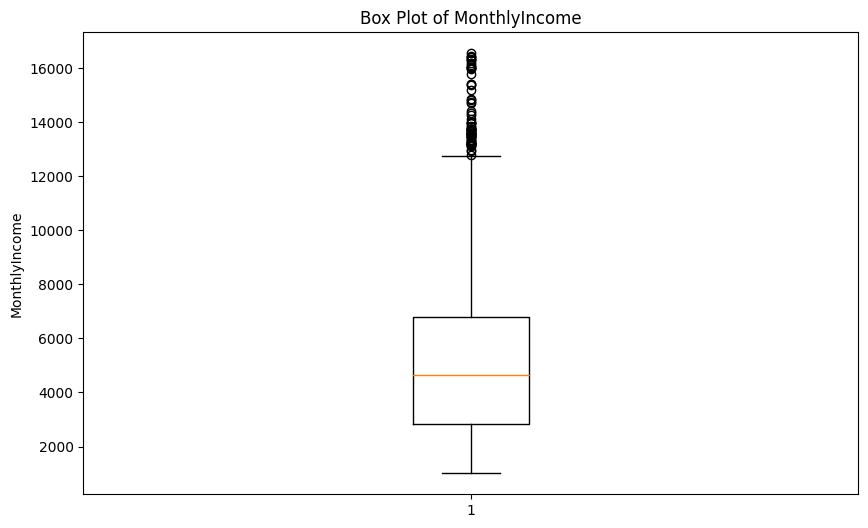

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df_clean['MonthlyIncome'])
plt.title('Box Plot of MonthlyIncome')
plt.ylabel('MonthlyIncome')
plt.show()

based on boxplot, there are some outliers detected.

In [195]:
def outliers(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  return (x < lower_bound) | (x > upper_bound)

outliers_mask = outliers(df_clean['MonthlyIncome'])
outliers_detected = df_clean[outliers_mask]
outliers_detected

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job_Satisfaction_Cat,Attrition_Numeric,TotalWorkingYearsBins
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,23,1,...,31,3,3,25,8,3,7,Very Satisfied,0,31-40
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,73,1,...,15,1,3,15,14,8,12,Very Satisfied,0,11-20
65,55,No,Travel_Rarely,836,Research & Development,8,3,Medical,84,4,...,21,2,3,5,0,0,2,Satisfied,0,21-30
77,45,No,Travel_Rarely,193,Research & Development,6,4,Other,101,4,...,17,3,4,0,0,0,0,Very Dissatisfied,0,11-20
78,37,No,Travel_Rarely,397,Research & Development,7,4,Medical,102,1,...,16,3,4,5,2,0,2,Satisfied,0,11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,42,No,Travel_Rarely,1396,Research & Development,6,3,Medical,1911,3,...,18,3,4,13,7,5,7,Very Dissatisfied,0,11-20
1403,39,No,Travel_Rarely,119,Sales,15,4,Marketing,1975,2,...,21,3,3,20,8,11,10,Very Dissatisfied,0,21-30
1430,38,No,Travel_Rarely,201,Research & Development,10,3,Medical,2015,2,...,20,3,3,18,16,1,11,Satisfied,0,11-20
1432,37,No,Travel_Rarely,161,Research & Development,10,3,Life Sciences,2017,3,...,16,2,3,16,11,6,8,Very Satisfied,0,11-20


delete outliers

In [196]:
df_clean = df_clean[~outliers_mask]
df_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job_Satisfaction_Cat,Attrition_Numeric,TotalWorkingYearsBins
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,Very Satisfied,1,0-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,10,3,3,10,7,1,7,Dissatisfied,0,0-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,7,3,3,0,0,0,0,Satisfied,1,0-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,8,3,3,8,7,3,0,Satisfied,0,0-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,6,3,3,2,2,2,2,Dissatisfied,0,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,17,3,3,5,2,0,3,Very Satisfied,0,11-20
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,9,5,3,7,7,1,7,Very Dissatisfied,0,0-10
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,6,0,3,6,2,0,3,Dissatisfied,0,0-10
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,17,3,2,9,6,0,8,Dissatisfied,0,11-20


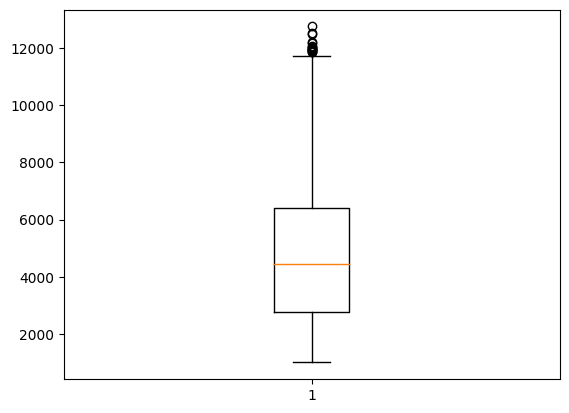

In [197]:
plt.boxplot(df_clean['MonthlyIncome'])
plt.show()

##Dropping Unnecessary Column

drop `EmployeeCount` because it's similar to `Employee ID`

In [166]:
df_clean = df_clean.drop(columns = ['EmployeeCount'])

In [167]:
df_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##Data Encoding

encoding job satisfaction categories into descriptive labels

In [168]:
satisfaction_map = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Satisfied',
    4: 'Very Satisfied'
}

df_clean['Job_Satisfaction_Cat'] = df_clean['JobSatisfaction'].map(satisfaction_map)
df_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job_Satisfaction_Cat
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,Very Satisfied
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,80,1,10,3,3,10,7,1,7,Dissatisfied
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,80,0,7,3,3,0,0,0,0,Satisfied
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,80,0,8,3,3,8,7,3,0,Satisfied
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,80,1,6,3,3,2,2,2,2,Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,80,1,17,3,3,5,2,0,3,Very Satisfied
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,80,1,9,5,3,7,7,1,7,Very Dissatisfied
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,80,1,6,0,3,6,2,0,3,Dissatisfied
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,80,0,17,3,2,9,6,0,8,Dissatisfied


#Employee Attrition Analysis

In [169]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1354 non-null   Int64 
 1   Attrition                 1354 non-null   object
 2   BusinessTravel            1354 non-null   object
 3   DailyRate                 1354 non-null   int64 
 4   Department                1354 non-null   object
 5   DistanceFromHome          1354 non-null   int64 
 6   Education                 1354 non-null   int64 
 7   EducationField            1354 non-null   object
 8   EmployeeNumber            1354 non-null   int64 
 9   EnvironmentSatisfaction   1354 non-null   int64 
 10  Gender                    1354 non-null   object
 11  HourlyRate                1354 non-null   int64 
 12  JobInvolvement            1354 non-null   int64 
 13  JobLevel                  1354 non-null   int64 
 14  JobRole                   135

##Descriptive Statistics

###Numeric columns

In [170]:
df_clean[['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'JobSatisfaction']].describe()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,JobSatisfaction
count,1354.0,1354.000000,1354.000000,1354.000000,1354.000000
mean,36.041359,9.337518,5501.728951,10.039143,2.737075
std,8.785347,8.128893,3319.020166,6.587908,1.101769
min,18.0,1.000000,1009.000000,0.000000,1.000000
25%,30.0,2.000000,2815.000000,6.000000,2.000000
50%,35.0,7.000000,4643.000000,9.000000,3.000000
75%,41.0,14.000000,6811.000000,13.000000,4.000000
max,60.0,29.000000,16555.000000,40.000000,4.000000


###Categorical columns

In [171]:
df_clean[['Department', 'JobRole', 'EducationField', 'Gender', 'MaritalStatus']].describe()

,Department,JobRole,EducationField,Gender,MaritalStatus
count,1354,1354,1354,1354,1354
unique,3,9,6,2,3
top,Research & Development,Sales Executive,Life Sciences,Male,Married
freq,882,326,559,810,610


##Attrition Rate by Variable

In [172]:
attrition = df_clean['Attrition'].value_counts().reset_index()
attrition

,Attrition,count
0,No,1122
1,Yes,232


In [173]:
att_yes = df_clean['Attrition'].value_counts()['Yes']
att_total = df_clean['Attrition'].count()

attrition_rate = (att_yes/att_total) * 100

print(f'Attrition Rate (Yes) = {attrition_rate:.2f}%')

Attrition Rate (Yes) = 17.13%


In [174]:
#encoded Attrition Category
df_clean['Attrition_Numeric'] = df_clean['Attrition'].apply(lambda x: 1 if x =='Yes' else 0)
df_clean['Attrition_Numeric'].head()

,Attrition_Numeric
0,1
1,0
2,1
3,0
4,0


###Attrition Rate by JobRole

In [175]:
attrition_role = df_clean.groupby('JobRole')['Attrition_Numeric'].mean().reset_index()
attrition_role.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)

attrition_role.sort_values('Attrition_Rate', ascending = False)

,JobRole,Attrition_Rate
8,Sales Representative,0.397590
2,Laboratory Technician,0.240310
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
3,Manager,0.071429
4,Manufacturing Director,0.069444
0,Healthcare Representative,0.068702
5,Research Director,0.000000


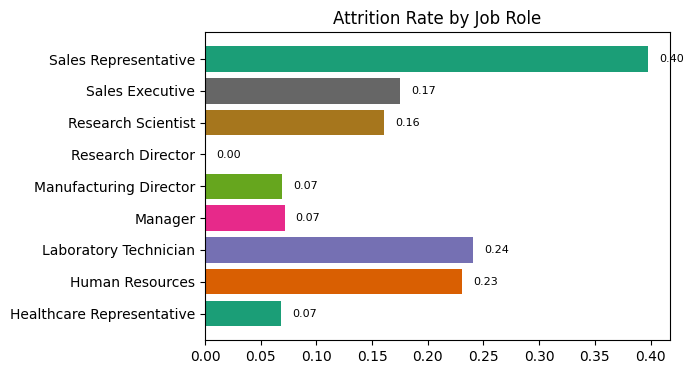

In [176]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
bars = plt.barh(attrition_role['JobRole'], attrition_role['Attrition_Rate'],
         color =plt.get_cmap('Dark2').colors)
plt.title('Attrition Rate by Job Role')

for bar in bars:
    width = bar.get_width() #nilai attrition rate
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, #posisi horizontal, vertikal
             f'{width:.2f}',
             va='center',
             ha='left',
             fontsize=8)

From the bar chart, **Sales Representative have the highest attrition rate**, with a significant **40%** leaving the job, followed by Laboratory Technician and Human Resources.
- I want to know understand the factors influencing this trend, so I'm conducting further EDA:

####Job Satisfaction and Job Role vs Attrition Rate

In [177]:
role_satis = df_clean.groupby(['JobRole', 'JobSatisfaction'])['Attrition_Numeric'].mean().reset_index()
role_satis.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)
role_satis.sort_values('Attrition_Rate', ascending = False).head(10)

,JobRole,JobSatisfaction,Attrition_Rate
32,Sales Representative,1,0.583333
4,Human Resources,1,0.500000
33,Sales Representative,2,0.476190
8,Laboratory Technician,1,0.357143
34,Sales Representative,3,0.333333
35,Sales Representative,4,0.304348
10,Laboratory Technician,3,0.280000
24,Research Scientist,1,0.240741
28,Sales Executive,1,0.231884
6,Human Resources,3,0.230769


- From this summary, we observe that the **top 3 job roles with the highest attrition rates** (Sales Rep, Laboratory Tech, Human Resources) also have the lowest job satisfaction **(Very Dissatisfied)**.
- This suggests that **dissatisfaction with their jobs may be a key factor contributing to the high attrition rates** in these roles.

####Over Time and Job Role vs Attrition Rate

In [178]:
role_time = df_clean.groupby(['JobRole', 'OverTime'])['Attrition_Numeric'].mean().reset_index()
role_time.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)
role_time.sort_values('Attrition_Rate', ascending = False).head(10)

,JobRole,OverTime,Attrition_Rate
17,Sales Representative,Yes,0.666667
5,Laboratory Technician,Yes,0.500000
3,Human Resources,Yes,0.384615
13,Research Scientist,Yes,0.340206
15,Sales Executive,Yes,0.329787
16,Sales Representative,No,0.288136
7,Manager,Yes,0.222222
2,Human Resources,No,0.179487
4,Laboratory Technician,No,0.158163
14,Sales Executive,No,0.112069


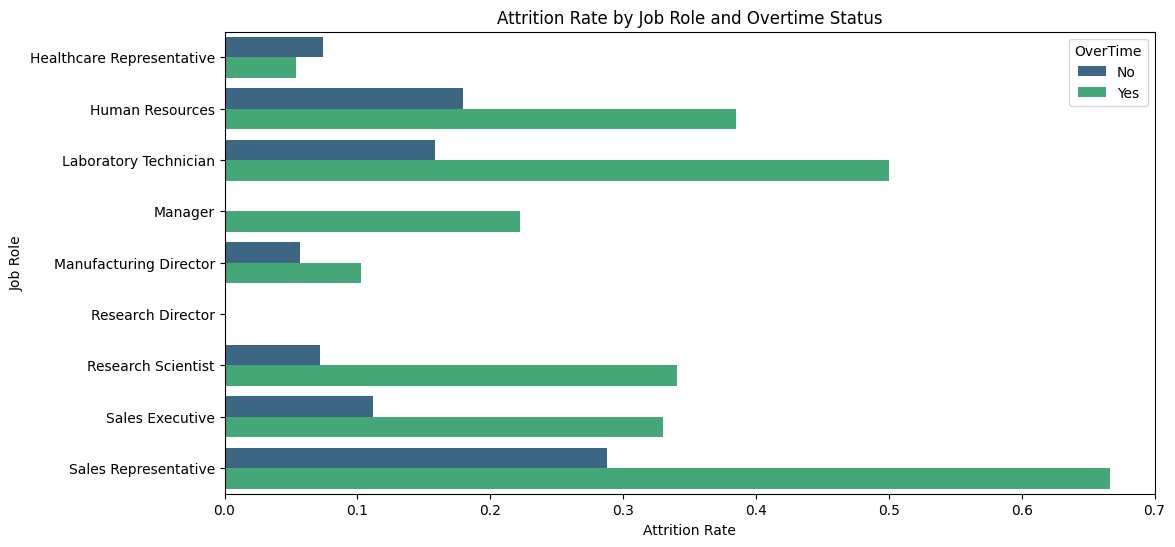

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Attrition_Rate', y='JobRole', hue='OverTime', #hue untuk membedakan berdasarkan kategori
            data=role_time, palette='viridis')

plt.title('Attrition Rate by Job Role and Overtime Status')
plt.xlabel('Attrition Rate')
plt.ylabel('Job Role')
plt.legend(title='OverTime')
plt.show()


- From this summary, we observe that the **top 3 job roles with the highest attrition rates** (Sales Rep, Laboratory Tech, Human Resources) also have a **higher proportion of employees who work overtime.**
- This suggests that **working overtime may be a key factor contributing to the high attrition rates** in these roles.

###Create Function for Attrition Rate by Category Column

In [180]:
def attrition_rate_by_category(df, column_name):

  attrition_df = df.groupby(column_name)['Attrition_Numeric'].mean().reset_index()
  attrition_df.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)

  attrition_df.sort_values('Attrition_Rate', ascending = False)

#Pie chart
  fig = plt.figure(figsize = (6,4))
  plt.pie(attrition_df['Attrition_Rate'], labels = attrition_df[column_name],
        autopct = '%1.2f%%', colors=plt.get_cmap('Pastel1').colors,
        startangle = 90)
  plt.title(f'Attrition Rate by {column_name}')

####Attrition Rate by Marital Status

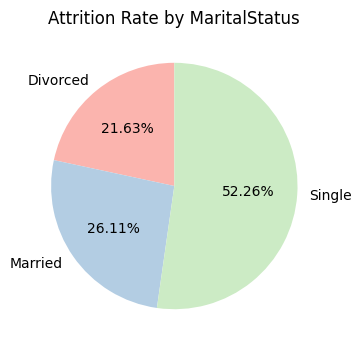

In [181]:
attrition_rate_by_category(df_clean, 'MaritalStatus')

####Attrition Rate by Department

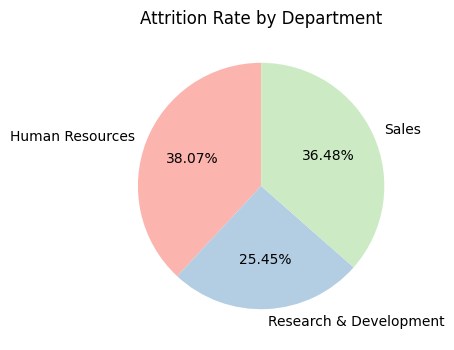

In [182]:
attrition_rate_by_category(df_clean, 'Department')

####Attrition Rate by Gender

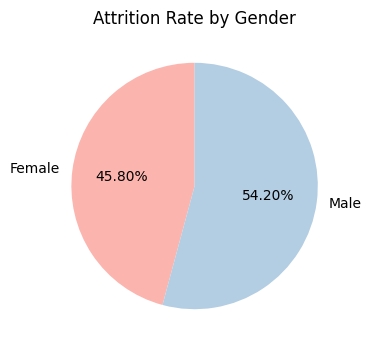

In [183]:
attrition_rate_by_category(df_clean, 'Gender')

##Monthly Income vs Attrition

In [184]:
att_yes = df_clean[df_clean['Attrition'] == 'Yes']
att_no = df_clean[df_clean['Attrition'] == 'No']

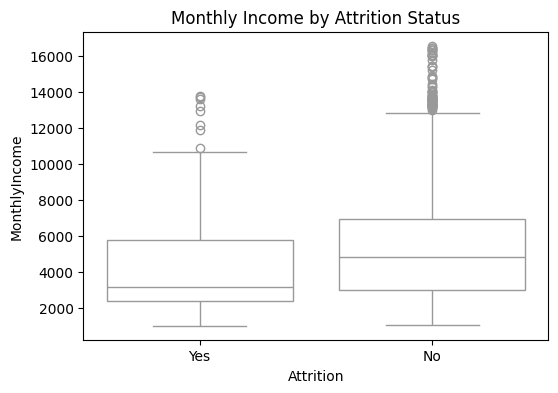

In [185]:
import seaborn as sns

fig = plt.figure(figsize = (6,4))
sns.boxplot(data = df_clean, x = df_clean['Attrition'], y = df_clean['MonthlyIncome'],color = 'white')
plt.title('Monthly Income by Attrition Status')
plt.show()

From the boxplot, we can see that employees with attrition tend to have a lower monthly income compared to employees without attrition.

##Job Satisfaction vs Attrition

In [186]:
satis_att = df_clean.groupby('Job_Satisfaction_Cat', as_index = False)['Attrition_Numeric'].mean()
satis_att.sort_values('Attrition_Numeric', ascending = False)

,Job_Satisfaction_Cat,Attrition_Numeric
2,Very Dissatisfied,0.247148
1,Satisfied,0.176904
0,Dissatisfied,0.171206
3,Very Satisfied,0.119438


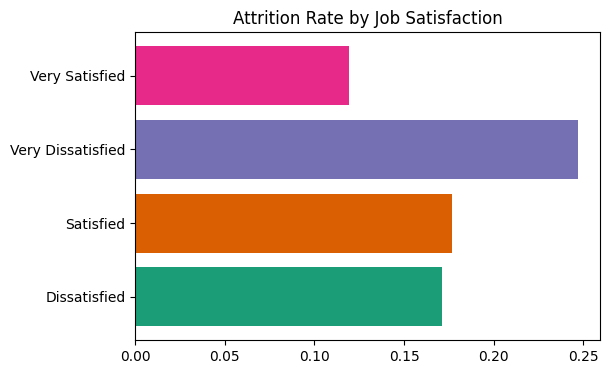

In [187]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
plt.barh(satis_att['Job_Satisfaction_Cat'], satis_att['Attrition_Numeric'],
         color =plt.get_cmap('Dark2').colors)
plt.title('Attrition Rate by Job Satisfaction')
plt.show()

- Employees who are very dissatisfied with their job have the highest attrition rate (25.4%).
- This suggests that high dissatisfaction is **strongly associated** with a higher likelihood of leaving the company

##Commute Distance vs Attrition

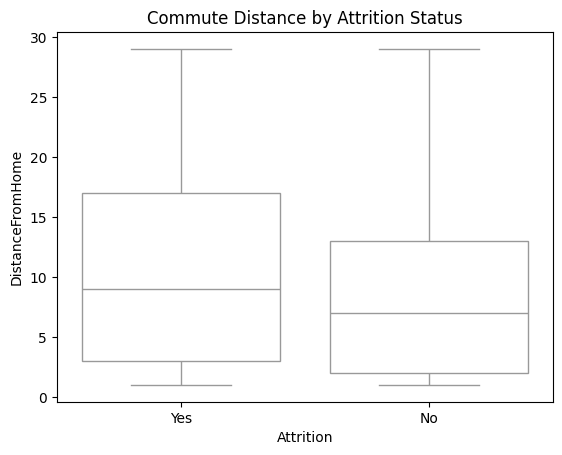

In [188]:
import seaborn as sns
sns.boxplot(df_clean, x = df_clean['Attrition'], y = df_clean['DistanceFromHome'], color = 'white')
plt.title('Commute Distance by Attrition Status')
plt.show()

Employees who have a longer distance from home are more likely to attrite



##Tenure Analysis

In [189]:
#create total working years bin
df_clean = df_clean.copy()
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '11-20', '21-30', '31-40']
df_clean['TotalWorkingYearsBins'] = pd.cut(df_clean['TotalWorkingYears'], bins = bins, labels = labels, include_lowest = True)
df_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job_Satisfaction_Cat,Attrition_Numeric,TotalWorkingYearsBins
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,Very Satisfied,1,0-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,10,3,3,10,7,1,7,Dissatisfied,0,0-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,7,3,3,0,0,0,0,Satisfied,1,0-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,8,3,3,8,7,3,0,Satisfied,0,0-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,6,3,3,2,2,2,2,Dissatisfied,0,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,17,3,3,5,2,0,3,Very Satisfied,0,11-20
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,9,5,3,7,7,1,7,Very Dissatisfied,0,0-10
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,6,0,3,6,2,0,3,Dissatisfied,0,0-10
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,17,3,2,9,6,0,8,Dissatisfied,0,11-20


In [190]:
pd.cut(df_clean['TotalWorkingYears'], bins=bins, labels = labels, include_lowest=True).value_counts()


,count
TotalWorkingYears,
0-10,920
11-20,338
21-30,75
31-40,21


In [191]:
tenure = df_clean.groupby('TotalWorkingYearsBins')['Attrition_Numeric'].mean()
tenure

<ipython-input-191-2b726ee2ea1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure = df_clean.groupby('TotalWorkingYearsBins')['Attrition_Numeric'].mean()


,Attrition_Numeric
TotalWorkingYearsBins,
0-10,0.197826
11-20,0.115385
21-30,0.106667
31-40,0.142857


In [192]:
tenure2 = df_clean.groupby('TotalWorkingYears', as_index = False)['Attrition_Numeric'].mean().round(2)
tenure2.rename(columns = {
    'Attrition_Numeric' : 'Attrition_Rate'},
    inplace = True)

tenure2 = pd.DataFrame(tenure2)
tenure2.head()

,TotalWorkingYears,Attrition_Rate
0,0,0.45
1,1,0.49
2,2,0.29
3,3,0.21
4,4,0.19


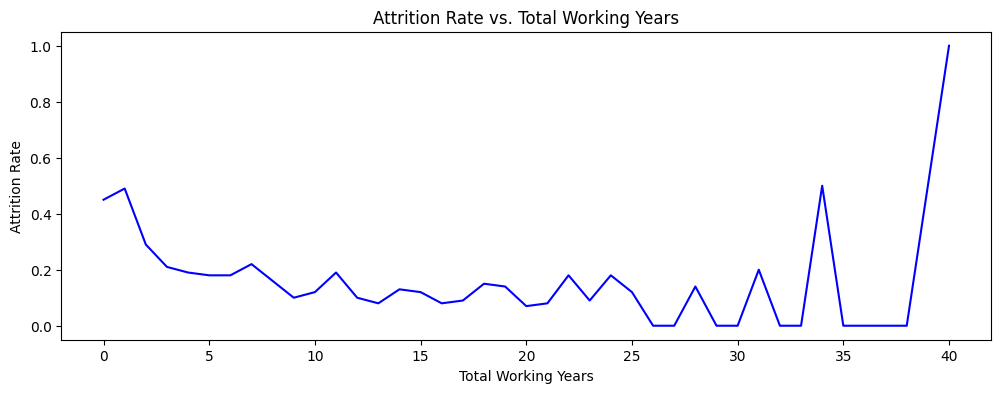

In [193]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()

ax.plot(tenure2['TotalWorkingYears'], tenure2['Attrition_Rate'],
        color='blue', linestyle='-')
ax.set_xlabel('Total Working Years')
ax.set_ylabel('Attrition Rate')
ax.set_title('Attrition Rate vs. Total Working Years')

plt.show()

- There is **decreasing trend in attrition rates for 0-10 years range**, but it still higher compared to the 11-20 and 21-30 years range, which have relatively stable and lower attrition rates
- The attrition rate **peaks significantly for employees in the 30-40 work years** range, indicating a higher likelihood of attrition among older group.

#Summary
1. **Sales Representatives** have the **highest attrition rate** (**39.76%**), followes by Laboratory Technicians (24.03%) and Human Resources (23.08%)
  - These 3 job roles also have the **lowest job satisfaction.**
  - Also have a **higher proportion of employees who work overtime.**
  - This suggest that **dissatisfaction and working overtime could be a significant factor influencing high attrition.**

2. The boxplot analysis indicates that **employees with lower monthly incomes**  and **have longer commute distance** are more likely to attrite.

3. There is a **different trend in working years** for each age range.
  - Negative trend of attrition rates for employees with 0-10 years range but it still higher than 11-30 range
  - Stationer at 11-30 years range
  - Significant peak for employees with 31-50 years experience.



#Recommendations
1. Improve employee retention, such as identify and resolve job disssatisfaction (example by survey employees) or reviewing overtime policies.
2. Consider transfortation support to reduce the impact of long commutes on employee retention.
3. Make different approach for each working years range:
  - 0-10 years: focus on improving or providing growth opportunities, such as career development.
  - 11-30 years: maintain engagement by rewarding long-term contributions
  - 31-40 years: implementing targeted retirement planning or flexible work options.